In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
import time

import matplotlib.pyplot as plt
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data_dir = '../input/cough-detection/melspectrograms'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
data_generator = ImageDataGenerator(rescale=1./255.,validation_split=0.33,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5)
train_generator = data_generator.flow_from_directory(directory='../input/cough-detection/melspectrograms/training',             
                                                     target_size=(224, 224),
                                                     class_mode='binary',
                                                     subset='training',
                                                     batch_size=32,
                                                     color_mode='rgb'
                                                     )

valid_generator = data_generator.flow_from_directory(directory='../input/cough-detection/melspectrograms/testing',
                                                     target_size=(224, 224),
                                                     class_mode='binary',
                                                     subset='validation',
                                                     batch_size=16,
                                                     color_mode='rgb'
                                                    )

classes = ['cough', 'no_cough']

Found 1073 images belonging to 2 classes.
Found 131 images belonging to 2 classes.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


Text(0.5, 1.0, 'On validation set')

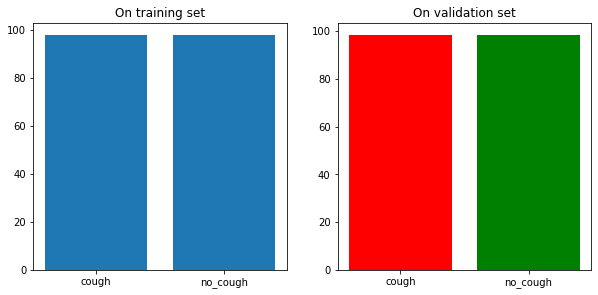

In [4]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.bar(classes, train_generator.labels.sum(axis = 0)/train_generator.n * 100)
plt.title('On training set')
plt.subplot(2,2,2)
plt.bar(classes, valid_generator.labels.sum(axis = 0)/valid_generator.n * 100, color='rgb')
plt.title('On validation set')

In [5]:
sample_training_images, _ = next(train_generator)

In [6]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    labels = sample_training_images
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

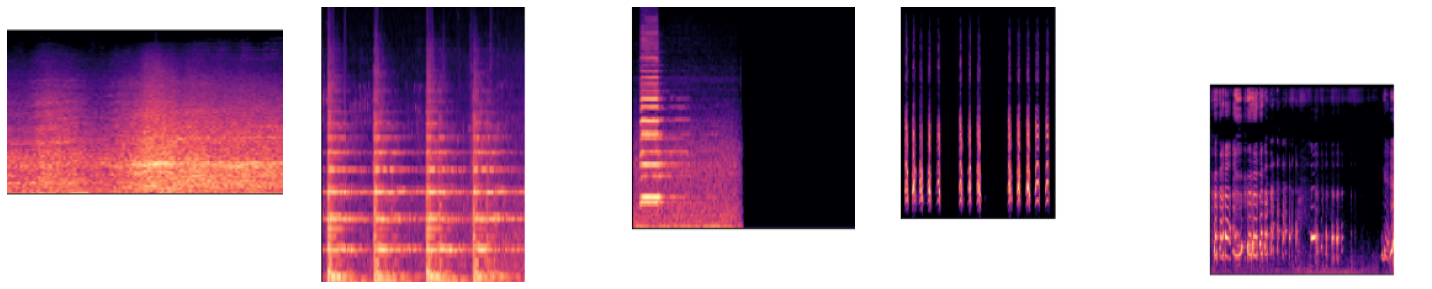

In [7]:
plotImages(sample_training_images[:5])

In [8]:
model = tf.keras.models.Sequential()
model.add(MobileNetV2(include_top=False, pooling='avg', weights='imagenet', input_shape=(224, 224, 3), classes=2))
model.add(Dense(2, activation='softmax'))
model.layers[0].trainable = False
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

9412608/9406464 [==============================] - 0s 0us/step


In [9]:
history = model.fit_generator(train_generator,
                              #steps_per_epoch = 150,
                              epochs=15,
                              #validation_steps = 30,
                              validation_data=valid_generator
                              )

Epoch 1/15
34/34 [==============================] - 24s 712ms/step - loss: 0.1869 - accuracy: 0.9571 - val_loss: 0.0896 - val_accuracy: 0.9847
Epoch 2/15
34/34 [==============================] - 20s 595ms/step - loss: 0.1009 - accuracy: 0.9795 - val_loss: 0.0747 - val_accuracy: 0.9847
Epoch 3/15
34/34 [==============================] - 21s 620ms/step - loss: 0.0881 - accuracy: 0.9795 - val_loss: 0.0708 - val_accuracy: 0.9847
Epoch 4/15
34/34 [==============================] - 21s 608ms/step - loss: 0.0825 - accuracy: 0.9786 - val_loss: 0.0673 - val_accuracy: 0.9847
Epoch 5/15
34/34 [==============================] - 21s 607ms/step - loss: 0.0832 - accuracy: 0.9786 - val_loss: 0.0772 - val_accuracy: 0.9847
Epoch 6/15
34/34 [==============================] - 21s 628ms/step - loss: 0.0624 - accuracy: 0.9804 - val_loss: 0.0588 - val_accuracy: 0.9847
Epoch 7/15
34/34 [==============================] - 20s 596ms/step - loss: 0.0623 - accuracy: 0.9804 - val_loss: 0.0627 - val_accuracy: 0.9847

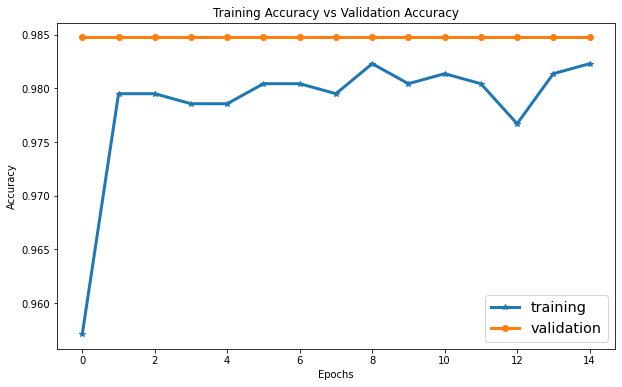

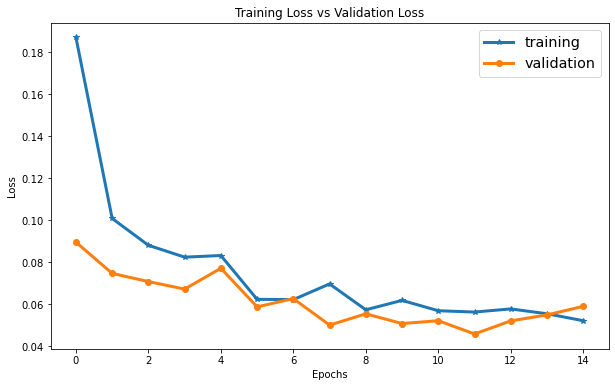

In [10]:
def visualize_training(history, lw = 3):
    plt.figure(figsize=(10,6))
    plt.plot(history.history['accuracy'], label = 'training', marker = '*', linewidth = lw)
    plt.plot(history.history['val_accuracy'], label = 'validation', marker = 'o', linewidth = lw)
    plt.title('Training Accuracy vs Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(fontsize = 'x-large')
    plt.show()

    plt.figure(figsize=(10,6))
    plt.plot(history.history['loss'], label = 'training', marker = '*', linewidth = lw)
    plt.plot(history.history['val_loss'], label = 'validation', marker = 'o', linewidth = lw)
    plt.title('Training Loss vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(fontsize = 'x-large')
    plt.show()
visualize_training(history)

In [11]:
preds = model.predict_generator(valid_generator,steps=15)

In [12]:
preds[0]

array([0.06246583, 0.9375342 ], dtype=float32)

In [13]:
label = valid_generator.classes

In [14]:
pred= model.predict(valid_generator)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (valid_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]
print(predicted_class_indices)
print (labels)
print (predictions)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
{'cough': 0, 'no_cough': 1}
['no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_cough', 'no_coug

In [15]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(predicted_class_indices,label)
cf_matrix

array([[  0,   0],
       [  2, 129]])

In [16]:
exp_series = pd.Series(label)
pred_series = pd.Series(predicted_class_indices)
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,1,All
Actual,,
0,2,2
1,129,129
All,131,131
